In [1]:
from operator import mul
import urllib2
import numpy as np
import tensorflow as tf
import os
import cv2
import time


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from tftools import data
import sys
import os
episode_model_save_location = '/data/robotics/pick_episodes/models'
episode_data_save_location = '/data/robotics/pick_episodes/data'
pyrobo_path = '/home/karthik/code/pyrobo/'
sys.path.append(os.path.join(pyrobo_path, 'network_models'))

In [4]:
import trainer
import ps3_control
sess = tf.Session()

In [5]:
def read_episode():
    try:
        with open(os.path.join(episode_data_save_location, 'episode'), 'r') as f:
            current_episode = int(f.readline().strip())
    except IOError:
        current_episode = 0
    return current_episode

def write_episode(episode):
    with  open(os.path.join(episode_data_save_location, 'episode'), 'w') as f:
        f.write("%d"% (episode))

current_episode = read_episode()

In [6]:
tr = trainer.HomeTrainer(sess, episode_model_save_location,
                         episode_data_save_location, current_episode)

In [7]:
robot_url =  'http://localhost:8889/robot/%d/%d/%d/%d/%d/%d/'
ps3_url = 'http://localhost:8888/get'
controller = ps3_control.PS3_Control(robot_url, ps3_url)

http://localhost:8889/robot/1500/1500/1500/1500/1500/1500/


In [116]:
controller.reset()

http://localhost:8889/robot/1500/1500/1500/1500/1500/1500/


In [144]:
controller.get_ps3_out()

[]

In [145]:
current_episode = read_episode()
writer = data.TFDataWriter(episode_data_save_location + "/episode_%d.tfrecords"%current_episode)
episode_end = False
try:
    while not episode_end:
        time.sleep(0.1)
        pressed = controller.get_ps3_out()        
        for press in pressed:
            if press == ps3_control.EPISODE_END_BUTTON:
                print "coming here"
                episode_end = True
                break
            if press in ps3_control.button_motor_map or press == ps3_control.USE_MODEL_BUTTON:
                if press == ps3_control.USE_MODEL_BUTTON:
                    motor, direction = tr.predict(controller.motor_state_array())
                else:
                    motor, direction = ps3_control.button_motor_map.get(press,[None, None])
                    if motor is None:
                        continue
                    writer.add( tr.get_data_to_save() + 
                                [['motor', [motor], data.INT_TYP],
                                ['direction', [direction], data.INT_TYP],
                                ['motor_state', controller.motor_state_array() , data.FLT_TYP]])
                controller.update_state(motor, direction)
finally:
    writer.close()
    controller.reset()
    write_episode(current_episode+1)
    print current_episode

(1, 1)
http://localhost:8889/robot/1500/1525/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1550/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1575/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1600/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1625/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1650/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1675/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1700/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1725/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1750/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1775/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1800/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1825/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1850/1500/1500/1500/1500/
(1, 1)
http://localhost:8889/robot/1500/1875/1500/1500/1500/1500/
(1, 1)
htt

In [146]:

current_episode = read_episode()
tr.retrain_model(current_episode, 15000, 100)

Episode: 43, Step: 0, Loss: 1.530170
Episode: 43, Step: 100, Loss: 1.683078
Episode: 43, Step: 200, Loss: 1.678250
Episode: 43, Step: 300, Loss: 1.756480
Episode: 43, Step: 400, Loss: 2.055304
Episode: 43, Step: 500, Loss: 1.849111
Episode: 43, Step: 600, Loss: 1.019146
Episode: 43, Step: 700, Loss: 1.932637
Episode: 43, Step: 800, Loss: 1.158508
Episode: 43, Step: 900, Loss: 1.902204
Episode: 43, Step: 1000, Loss: 1.833253
Episode: 43, Step: 1100, Loss: 1.679244
Episode: 43, Step: 1200, Loss: 1.417093
Episode: 43, Step: 1300, Loss: 1.458277
Episode: 43, Step: 1400, Loss: 1.464840
Episode: 43, Step: 1500, Loss: 1.688559
Episode: 43, Step: 1600, Loss: 1.751777
Episode: 43, Step: 1700, Loss: 0.977880
Episode: 43, Step: 1800, Loss: 1.658663
Episode: 43, Step: 1900, Loss: 1.436726
Episode: 43, Step: 2000, Loss: 2.093652
Episode: 43, Step: 2100, Loss: 1.122556
Episode: 43, Step: 2200, Loss: 1.666834
Episode: 43, Step: 2300, Loss: 1.221202
Episode: 43, Step: 2400, Loss: 2.448350
Episode: 43,

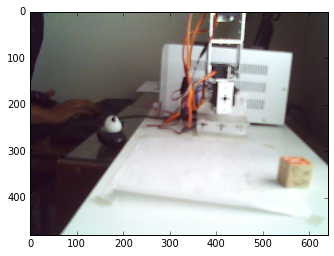

In [143]:
left, right = tr.get_images()

plt.imshow(right)
